In [1]:
# null, NaN or NA = missing value
# missing data : (i)python : (ii) pandas

In [1]:
import numpy as np
import pandas as pd

In [3]:
data1 = np.array([1, np.nan, 3, 4])
data1

array([ 1., nan,  3.,  4.])

In [4]:
1 + np.nan

nan

In [5]:
8 * np.nan

nan

In [7]:
data1.sum(), data1.min()

(nan, nan)

In [9]:
# numpy
np.nansum(data1)

8.0

In [10]:
np.nanmin(data1)

1.0

In [12]:
np.nanmax(data1)

4.0

In [13]:
# NaN and None in pandas
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [14]:
x = pd.Series (range(3), dtype=int)
x

0    0
1    1
2    2
dtype: int64

In [16]:
x[0] = None

In [17]:
x

0    NaN
1    1.0
2    2.0
dtype: float64

# ## operation on missing value:
1. isnull() : generate a boolean mask indicing missing value
2. notnull(): opposte from isnull()
3. dropna()
4. fillna()

In [18]:
data2 = pd.Series([1, np.nan, 'Cambodia', None])

In [19]:
data2.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [20]:
data2.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [22]:
data2[data2.notnull()]

0           1
2    Cambodia
dtype: object

In [23]:
# Droping null value

In [24]:
data2.dropna()

0           1
2    Cambodia
dtype: object

In [28]:
df = pd.DataFrame([[1, np.nan, 6],
                   [3, 7, 8 ],
                   [np.nan, 4, 5]])
df

,0,1,2
0,1.0,NaN,6
1,3.0,7.0,8
2,NaN,4.0,5


In [31]:
df.dropna()

,0,1,2
1,3.0,7.0,8


In [34]:
df.dropna(axis='columns')

,2
0,6
1,8
2,5


In [35]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,6,NaN
1,3.0,7.0,8,NaN
2,NaN,4.0,5,NaN


In [38]:
df.loc[len(df.index)] = [4, 7, 8, np.nan]
df

,0,1,2,3
0,1.0,NaN,6.0,NaN
1,3.0,7.0,8.0,NaN
2,NaN,4.0,5.0,NaN
3,4.0,7.0,8.0,NaN
4,4.0,7.0,8.0,NaN


In [40]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,6.0
1,3.0,7.0,8.0
2,NaN,4.0,5.0
3,4.0,7.0,8.0
4,4.0,7.0,8.0


In [44]:
df.dropna(axis='rows', thresh=3) 

,0,1,2,3
1,3.0,7.0,8.0,NaN
3,4.0,7.0,8.0,NaN
4,4.0,7.0,8.0,NaN


In [48]:
# fill null value
data3 = pd.Series([1, np.nan, 2, None, 6], index = list('abcde'))
data3

a    1.0
b    NaN
c    2.0
d    NaN
e    6.0
dtype: float64

In [49]:
data3.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    6.0
dtype: float64

In [51]:
data3.fillna(9999)

a       1.0
b    9999.0
c       2.0
d    9999.0
e       6.0
dtype: float64

In [58]:
#forward-fill
data3.fillna(method = 'ffill')
data3

a    1.0
b    NaN
c    2.0
d    NaN
e    6.0
dtype: float64

In [57]:
data3.fillna(method = 'bfill')
data3

a    1.0
b    NaN
c    2.0
d    NaN
e    6.0
dtype: float64

In [54]:
df

,0,1,2,3
0,1.0,NaN,6.0,NaN
1,3.0,7.0,8.0,NaN
2,NaN,4.0,5.0,NaN
3,4.0,7.0,8.0,NaN
4,4.0,7.0,8.0,NaN


In [55]:
df.fillna(method = 'ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,6.0,6.0
1,3.0,7.0,8.0,8.0
2,NaN,4.0,5.0,5.0
3,4.0,7.0,8.0,8.0
4,4.0,7.0,8.0,8.0


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [76]:
outlier = []
def detect_oulier(data):
    treshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = ( i - mean ) / std
        if np.abs(z_score) > treshold:
            outlier.append(i)
    return outlier
        

In [77]:
detect_oulier(dataset)

[102, 107, 108]

In [88]:
import pandas as pd 
from sklearn.datasets import load_boston
boston = load_boston( )
x = boston.data 
y = boston.target 
columns = boston.feature_names 
#create the dataframe 
boston_df = pd.DataFrame( boston.data ) 
boston_df.columns = columns 
boston_df.head( )

/home/ngounse/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/home/ngounse/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

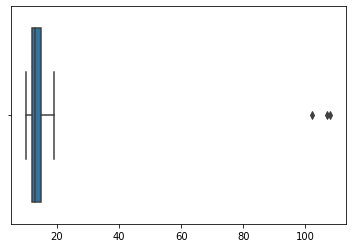

In [92]:
import seaborn as sns
sns.boxplot(dataset)

/home/ngounse/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

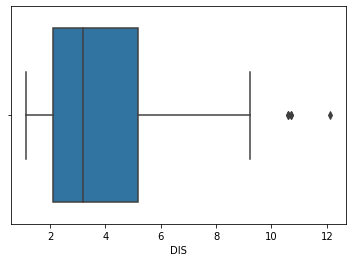

In [93]:
sns.boxplot(boston_df['DIS'])